In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import interpolate   # 선형보간
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score  #정확도 
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor  #vif지수


pd.set_option('display.max_columns', None)
#pd.set_option('display.max_row', None)

In [2]:
import warnings
warnings.filterwarnings("ignore")

- 구름
  - HCDC : High Cloud Cover (%)  
  - LCDC : Low Cloud Cover (%)    
  - MCDC : Medium Cloud Cover (%)   
  - TCAR :TOTAL CLOUD AMOUNT RANDOM OVERLAP
    
- 바람    
  - MXGUST : Maximum Wind Speed at 0 m above ground (m/s)   
  - N50MU : 50 METRE WIND U-COMPONENT (m/s)
  - N50MV: 50 METRE WIND V-COMPONENT (m/s)
  - UGRD : U-Component of Wind at 10 m above ground
  - VGRD : V-Component of Wind at 10 m above ground

- 습도    
  - RH   
  - SPFH 
  
- 온도, 열
  - TMAX : Maximum Temperature at 1.5 m above ground
  - TMIN : Minimum Temperature at 1.5 m above ground
  - TMP : Temperature at 1.5 m above ground
  - NDNSW : NET DOWN SURFACE SW FLUX (지표면 장파복사열)
  - TDSWS : TOTAL DOWNWARD SURFACE SW FLUX
  - SWDIF : DIFFUSE SW FLUX (ON RHO LEVELS) at 2 m above ground
  - SWDIR : DIRECT SW FLUX (ON RHO LEVELS) at 2 m above ground

    
  - PRES : Pressure
  - PRMSL : PRMSL_meansealevel(해수면변화 측정)
  - DPT : 태양열의 흡수와 열교환을 목적으로 사용
  - VIS : Visibility at 1.5 m above ground(가시성)  
  - NCPCP : Large-Scale Precipitation (non-convective) 대규모 강수량  
  - SNOL : Large-Scale Snow   

In [3]:
data = pd.read_csv('./data/사전과제_data(대외비).csv')
data.head()

,datetime,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
0,2019-06-28 0:00,0.0,292.83881,0.000000,0.208588,0.221466,3.682800,1.847509,2.763273,0.0,0.0,100128.39,100154.00,95.563927,0.0,0.014404,0.0,0.0,0.820679,0.0,293.55634,293.53430,293.66138,0.807296,2.454707,5253.2329
1,2019-06-28 1:00,0.0,292.88571,0.064789,0.278748,0.198456,5.553069,1.899890,4.664735,0.0,0.0,100141.63,100167.02,96.102135,0.0,0.014404,0.0,0.0,0.888611,0.0,293.57761,293.55603,293.68283,0.529665,4.009634,4458.9321
2,2019-06-28 2:00,0.0,293.00406,0.065216,0.411865,0.271515,6.369141,1.295991,5.426573,0.0,0.0,100132.73,100158.17,97.152420,0.0,0.014641,0.0,0.0,0.987091,0.0,293.55991,293.45306,293.72989,-0.389507,4.696301,3831.2681
3,2019-06-28 3:00,0.0,293.04767,0.015625,0.333740,0.180115,6.471650,0.326472,5.467535,0.0,0.0,100121.87,100148.17,97.398071,0.0,0.014649,0.0,0.0,0.987091,0.0,293.47855,293.45660,293.70828,-0.388263,4.385302,3789.1816
4,2019-06-28 4:00,0.0,293.06934,0.093750,0.294647,0.052338,6.159808,0.068942,5.358360,0.0,0.0,100135.45,100161.19,97.384186,0.0,0.014648,0.0,0.0,0.974213,0.0,293.47440,293.45651,293.68655,-0.329056,4.479684,4061.2871


In [4]:
data.head()

,datetime,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
0,2019-06-28 0:00,0.0,292.83881,0.000000,0.208588,0.221466,3.682800,1.847509,2.763273,0.0,0.0,100128.39,100154.00,95.563927,0.0,0.014404,0.0,0.0,0.820679,0.0,293.55634,293.53430,293.66138,0.807296,2.454707,5253.2329
1,2019-06-28 1:00,0.0,292.88571,0.064789,0.278748,0.198456,5.553069,1.899890,4.664735,0.0,0.0,100141.63,100167.02,96.102135,0.0,0.014404,0.0,0.0,0.888611,0.0,293.57761,293.55603,293.68283,0.529665,4.009634,4458.9321
2,2019-06-28 2:00,0.0,293.00406,0.065216,0.411865,0.271515,6.369141,1.295991,5.426573,0.0,0.0,100132.73,100158.17,97.152420,0.0,0.014641,0.0,0.0,0.987091,0.0,293.55991,293.45306,293.72989,-0.389507,4.696301,3831.2681
3,2019-06-28 3:00,0.0,293.04767,0.015625,0.333740,0.180115,6.471650,0.326472,5.467535,0.0,0.0,100121.87,100148.17,97.398071,0.0,0.014649,0.0,0.0,0.987091,0.0,293.47855,293.45660,293.70828,-0.388263,4.385302,3789.1816
4,2019-06-28 4:00,0.0,293.06934,0.093750,0.294647,0.052338,6.159808,0.068942,5.358360,0.0,0.0,100135.45,100161.19,97.384186,0.0,0.014648,0.0,0.0,0.974213,0.0,293.47440,293.45651,293.68655,-0.329056,4.479684,4061.2871


In [5]:
data.describe()

,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
count,22662.000000,22494.000000,22494.000000,22494.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000,22470.000000
mean,10480.569321,282.608439,0.298232,0.311569,0.226534,8.514256,1.703122,-0.497501,0.144576,163.955344,101572.642926,101604.898699,77.585871,0.001651,0.008702,63.394058,114.321061,0.693976,177.676412,286.802096,286.399237,288.528413,0.924964,-0.965852,24713.720017
std,16256.016690,9.512896,0.370127,0.371906,0.355870,4.689025,4.653624,5.370105,1.404132,245.436310,862.941092,863.646625,13.563617,0.033077,0.005173,90.200236,208.266613,0.407181,263.125027,8.456487,8.491048,7.353683,3.695723,4.445996,16993.617704
min,0.000000,257.834350,0.000000,0.000000,0.000000,0.789551,-21.822517,-21.447340,0.000000,0.000000,97939.086000,97964.180000,30.477089,0.000000,0.001178,0.000000,0.000000,0.000000,0.000000,267.138550,266.406220,275.928280,-18.615330,-18.573994,19.106869
25%,0.000000,274.923080,0.000000,0.000000,0.000000,5.037655,-1.135010,-4.172215,0.000000,0.000000,100903.970000,100934.805000,66.815433,0.000000,0.004302,0.000000,0.000000,0.278564,0.000000,279.522335,279.146572,281.285500,-1.444218,-3.791789,11360.670250
50%,0.000000,282.326445,0.062500,0.101593,0.000000,7.480424,1.527756,-0.938543,0.000000,5.501953,101636.750000,101677.805000,78.428546,0.000000,0.007131,5.524490,0.000000,0.982147,6.096680,287.079695,286.631680,288.640670,0.743261,-1.337835,21077.447500
75%,16985.587750,291.457975,0.593750,0.630463,0.380135,10.870264,4.403746,2.647588,0.000000,272.998857,102239.610000,102270.630000,88.971813,0.000000,0.013141,99.369844,130.015625,1.000000,301.744157,294.685203,294.326908,295.536107,3.159547,1.662547,34966.373750
max,63475.351000,299.287320,1.000006,1.000000,1.000000,38.869167,25.704344,30.286469,54.830078,980.527830,103644.550000,103673.340000,104.500310,2.016602,0.021400,529.763610,936.984380,1.000008,1035.399200,304.775630,304.524960,302.365600,19.557364,25.152510,93041.609000


In [6]:
# column들의 count수가 다름 
# 결측치 조회
data.isna().sum()

datetime      0
Power         0
DPT         168
HCDC        168
LCDC        168
MCDC        192
MXGUST      192
N50MU       192
N50MV       192
NCPCP       192
NDNSW       192
PRES        192
PRMSL       192
RH          192
SNOL        192
SPFH        192
SWDIF       192
SWDIR       192
TCAR        192
TDSWS       192
TMAX        192
TMIN        192
TMP         192
UGRD        192
VGRD        192
VIS         192
dtype: int64

In [7]:
#선형보간법

data=data.interpolate(method="linear")

In [8]:
#결측치 해결
data.isna().sum()

datetime    0
Power       0
DPT         0
HCDC        0
LCDC        0
MCDC        0
MXGUST      0
N50MU       0
N50MV       0
NCPCP       0
NDNSW       0
PRES        0
PRMSL       0
RH          0
SNOL        0
SPFH        0
SWDIF       0
SWDIR       0
TCAR        0
TDSWS       0
TMAX        0
TMIN        0
TMP         0
UGRD        0
VGRD        0
VIS         0
dtype: int64

In [9]:
data.describe()

,Power,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
count,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000
mean,10480.569321,282.613203,0.298466,0.312431,0.226684,8.522978,1.719405,-0.520225,0.143352,162.566260,101573.625019,101605.840526,77.539134,0.001637,0.008703,62.856962,113.352495,0.695344,176.171078,286.807468,286.404303,288.538701,0.935677,-0.985685,24737.154847
std,16256.016690,9.519852,0.370125,0.372057,0.355199,4.681217,4.652569,5.357747,1.398234,244.855923,863.448116,864.152104,13.535794,0.032937,0.005181,90.005053,207.646991,0.406331,262.513584,8.460699,8.495088,7.357904,3.699873,4.436807,16954.767573
min,0.000000,257.834350,0.000000,0.000000,0.000000,0.789551,-21.822517,-21.447340,0.000000,0.000000,97939.086000,97964.180000,30.477089,0.000000,0.001178,0.000000,0.000000,0.000000,0.000000,267.138550,266.406220,275.928280,-18.615330,-18.573994,19.106869
25%,0.000000,274.893690,0.000000,0.000000,0.000000,5.037655,-1.123986,-4.185865,0.000000,0.000000,100903.970000,100934.805000,66.779451,0.000000,0.004267,0.000000,0.000000,0.284393,0.000000,279.540487,279.168550,281.341093,-1.441672,-3.806664,11440.719500
50%,0.000000,282.307465,0.062500,0.103851,0.000000,7.497317,1.539925,-0.975609,0.000000,4.441895,101640.110000,101681.695000,78.326630,0.000000,0.007121,4.396240,0.000000,0.982086,4.900391,287.058275,286.601655,288.607805,0.752693,-1.360119,21129.002000
75%,16985.587750,291.481825,0.593750,0.634148,0.379662,10.925629,4.438017,2.597841,0.000000,269.275047,102243.747500,102274.007500,88.885521,0.000000,0.013141,98.855202,126.611328,1.000000,297.518740,294.705803,294.353142,295.556657,3.183374,1.632480,35002.008750
max,63475.351000,299.287320,1.000006,1.000000,1.000000,38.869167,25.704344,30.286469,54.830078,980.527830,103644.550000,103673.340000,104.500310,2.016602,0.021400,529.763610,936.984380,1.000008,1035.399200,304.775630,304.524960,302.365600,19.557364,25.152510,93041.609000


### 선형회귀를 이용하여 feature의 p-value 확인

In [10]:
target=data[['Power']]

In [11]:
[['datetime','Power','TCAR','LCDC', 'MCDC', 'MXGUST', 'NDNSW', 'VIS','RH', 'NCPCP', 'SNOL' ]]

[['datetime',
  'Power',
  'TCAR',
  'LCDC',
  'MCDC',
  'MXGUST',
  'NDNSW',
  'VIS',
  'RH',
  'NCPCP',
  'SNOL']]

In [12]:
x_data = data[[ 'DPT', 'HCDC', 'LCDC', 'MCDC', 'MXGUST', 'N50MU',
       'N50MV', 'NCPCP', 'NDNSW', 'PRES', 'PRMSL', 'RH', 'SNOL', 'SPFH',
       'SWDIF', 'SWDIR', 'TCAR', 'TDSWS', 'TMAX', 'TMIN', 'TMP', 'UGRD',
       'VGRD', 'VIS']]
x_data.head()

,DPT,HCDC,LCDC,MCDC,MXGUST,N50MU,N50MV,NCPCP,NDNSW,PRES,PRMSL,RH,SNOL,SPFH,SWDIF,SWDIR,TCAR,TDSWS,TMAX,TMIN,TMP,UGRD,VGRD,VIS
0,292.83881,0.000000,0.208588,0.221466,3.682800,1.847509,2.763273,0.0,0.0,100128.39,100154.00,95.563927,0.0,0.014404,0.0,0.0,0.820679,0.0,293.55634,293.53430,293.66138,0.807296,2.454707,5253.2329
1,292.88571,0.064789,0.278748,0.198456,5.553069,1.899890,4.664735,0.0,0.0,100141.63,100167.02,96.102135,0.0,0.014404,0.0,0.0,0.888611,0.0,293.57761,293.55603,293.68283,0.529665,4.009634,4458.9321
2,293.00406,0.065216,0.411865,0.271515,6.369141,1.295991,5.426573,0.0,0.0,100132.73,100158.17,97.152420,0.0,0.014641,0.0,0.0,0.987091,0.0,293.55991,293.45306,293.72989,-0.389507,4.696301,3831.2681
3,293.04767,0.015625,0.333740,0.180115,6.471650,0.326472,5.467535,0.0,0.0,100121.87,100148.17,97.398071,0.0,0.014649,0.0,0.0,0.987091,0.0,293.47855,293.45660,293.70828,-0.388263,4.385302,3789.1816
4,293.06934,0.093750,0.294647,0.052338,6.159808,0.068942,5.358360,0.0,0.0,100135.45,100161.19,97.384186,0.0,0.014648,0.0,0.0,0.974213,0.0,293.47440,293.45651,293.68655,-0.329056,4.479684,4061.2871


In [13]:
x_data1 = sm.add_constant(x_data, has_constant='add')

multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

In [14]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     3084.
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:45:29   Log-Likelihood:            -2.3544e+05
No. Observations:               22662   AIC:                         4.709e+05
Df Residuals:                   22637   BIC:                         4.711e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.889e+04   1.46e+04     -4.027      0.000   -8.76e+04   -3.02e+04
DPT         3044.9736    153.498     19.837      0.000    2744.107    3345.840
HCDC          91.1538    203.008      0.449      0.653    -306.756     489.064
LCDC        2886.4995    212.938     13.556      0.000    2469.126    3303.873
MCDC        1192.3495    186.977      6.377      0.000     825.862    1558.837
MXGUST       -98.2256     16.795     -5.849      0.000    -131.144     -65.307
N50MU       -422.0110     52.764     -7.998      0.000    -525.433    -318.589
N50MV        -77.3760     48.023     -1.611      0.107    -171.505      16.753
NCPCP        186.0105     40.739      4.566      0.000     106.160     265.861
NDNSW         10.0955      9.877      1.022      0.307      -9.264      29.455
PRES           2.8350      2.414      1.174      0.240      -1.897       7.567
PRMSL         -1.7685      2.419     -0.731      0.465      -6.511       2.973
RH          -625.8009     29.839    -20.972      0.000    -684.288    -567.313
SNOL        2077.2406   1630.412      1.274      0.203   -1118.478    5272.960
SPFH        2.769e+04   4.63e+04      0.598      0.550   -6.31e+04    1.18e+05
SWDIF        198.2670    166.892      1.188      0.235    -128.852     525.386
SWDIR        187.6816    166.992      1.124      0.261    -139.634     514.997
TCAR       -2774.4687    211.290    -13.131      0.000   -3188.612   -2360.325
TDSWS       -146.3436    167.099     -0.876      0.381    -473.869     181.182
TMAX          17.7795    178.918      0.099      0.921    -332.913     368.472
TMIN       -3562.0306    171.030    -20.827      0.000   -3897.262   -3226.799
TMP          539.6971     31.963     16.885      0.000     477.048     602.346
UGRD         256.5712     66.505      3.858      0.000     126.217     386.925
VGRD         140.7091     57.977      2.427      0.015      27.070     254.348
VIS            0.0292      0.004      6.941      0.000       0.021       0.037
==============================================================================
Omnibus:                     2704.361   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10910.581
Skew:                           0.547   Prob(JB):                         0.00
Kurtosis:                       6.218   Cond. No.                     1.30e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### column의 vif 지수 확인

In [15]:
data_cloud = data[['Power',"HCDC", "LCDC", "MCDC", "TCAR"]]
data_cloud.head()

,Power,HCDC,LCDC,MCDC,TCAR
0,0.0,0.000000,0.208588,0.221466,0.820679
1,0.0,0.064789,0.278748,0.198456,0.888611
2,0.0,0.065216,0.411865,0.271515,0.987091
3,0.0,0.015625,0.333740,0.180115,0.987091
4,0.0,0.093750,0.294647,0.052338,0.974213


In [16]:
vif_cloud=pd.DataFrame()
vif_cloud["VIF Factor"]=[variance_inflation_factor(data_cloud.values, i) 
                        for i in range(data_cloud.shape[1])]
vif_cloud['features'] = data_cloud.columns
vif_cloud

,VIF Factor,features
0,1.212167,Power
1,3.091291,HCDC
2,2.979852,LCDC
3,1.995713,MCDC
4,6.087622,TCAR


In [17]:
data_wind = data[['Power','MXGUST',"N50MU", "N50MV", "UGRD", "VGRD"]]
data_wind.head()

,Power,MXGUST,N50MU,N50MV,UGRD,VGRD
0,0.0,3.682800,1.847509,2.763273,0.807296,2.454707
1,0.0,5.553069,1.899890,4.664735,0.529665,4.009634
2,0.0,6.369141,1.295991,5.426573,-0.389507,4.696301
3,0.0,6.471650,0.326472,5.467535,-0.388263,4.385302
4,0.0,6.159808,0.068942,5.358360,-0.329056,4.479684


In [18]:
vif_wind=pd.DataFrame()
vif_wind["VIF Factor"]=[variance_inflation_factor(data_wind.values, i) 
                        for i in range(data_wind.shape[1])]
vif_wind['features'] = data_wind.columns
vif_wind

,VIF Factor,features
0,1.362693,Power
1,2.327511,MXGUST
2,22.553451,N50MU
3,20.959244,N50MV
4,20.219341,UGRD
5,22.252110,VGRD


In [19]:
data_hot = data[['Power','TMAX',"TMIN","TMP", "NDNSW", "TDSWS", 'SWDIF','SWDIR']]
data_hot.head()

,Power,TMAX,TMIN,TMP,NDNSW,TDSWS,SWDIF,SWDIR
0,0.0,293.55634,293.53430,293.66138,0.0,0.0,0.0,0.0
1,0.0,293.57761,293.55603,293.68283,0.0,0.0,0.0,0.0
2,0.0,293.55991,293.45306,293.72989,0.0,0.0,0.0,0.0
3,0.0,293.47855,293.45660,293.70828,0.0,0.0,0.0,0.0
4,0.0,293.47440,293.45651,293.68655,0.0,0.0,0.0,0.0


In [20]:
vif_hot=pd.DataFrame()
vif_hot["VIF Factor"]=[variance_inflation_factor(data_hot.values, i) 
                        for i in range(data_hot.shape[1])]
vif_hot['features'] = data_hot.columns
vif_hot

,VIF Factor,features
0,5.636557,Power
1,635337.461885,TMAX
2,614461.254559,TMIN
3,13729.283346,TMP
4,2459.766845,NDNSW
5,988659.079015,TDSWS
6,119047.194631,SWDIF
7,553585.078581,SWDIR


In [21]:
data_etc = data[['Power','PRES',"PRMSL","DPT", "VIS", "NCPCP", 'SNOL']]
data_etc.head()

,Power,PRES,PRMSL,DPT,VIS,NCPCP,SNOL
0,0.0,100128.39,100154.00,292.83881,5253.2329,0.0,0.0
1,0.0,100141.63,100167.02,292.88571,4458.9321,0.0,0.0
2,0.0,100132.73,100158.17,293.00406,3831.2681,0.0,0.0
3,0.0,100121.87,100148.17,293.04767,3789.1816,0.0,0.0
4,0.0,100135.45,100161.19,293.06934,4061.2871,0.0,0.0


In [22]:
vif_etc=pd.DataFrame()
vif_etc["VIF Factor"]=[variance_inflation_factor(data_etc.values, i) 
                        for i in range(data_etc.shape[1])]
vif_etc['features'] = data_etc.columns
vif_etc


,VIF Factor,features
0,1.445562e+00,Power
1,1.763291e+07,PRES
2,1.761924e+07,PRMSL
3,6.284320e+02,DPT
4,3.452639e+00,VIS
5,1.109228e+00,NCPCP
6,1.007113e+00,SNOL


In [23]:
data_h = data[['Power','SPFH', 'RH']]
data_h .head()

,Power,SPFH,RH
0,0.0,0.014404,95.563927
1,0.0,0.014404,96.102135
2,0.0,0.014641,97.152420
3,0.0,0.014649,97.398071
4,0.0,0.014648,97.384186


In [24]:
vif_h=pd.DataFrame()
vif_h["VIF Factor"]=[variance_inflation_factor(data_h.values, i) 
                        for i in range(data_h.shape[1])]
vif_h['features'] = data_h.columns
vif_h

,VIF Factor,features
0,1.337394,Power
1,5.022345,SPFH
2,5.357322,RH


#### p-value 0.05이상, VIF 수치 10이상 -> 다중공선성 의심 -> column 제거 

In [25]:
data_result = data[['datetime','Power','TCAR','LCDC', 'MCDC', 'MXGUST', 'NDNSW', 'VIS','RH', 'NCPCP', 'SNOL' ]]
data_result.head()

,datetime,Power,TCAR,LCDC,MCDC,MXGUST,NDNSW,VIS,RH,NCPCP,SNOL
0,2019-06-28 0:00,0.0,0.820679,0.208588,0.221466,3.682800,0.0,5253.2329,95.563927,0.0,0.0
1,2019-06-28 1:00,0.0,0.888611,0.278748,0.198456,5.553069,0.0,4458.9321,96.102135,0.0,0.0
2,2019-06-28 2:00,0.0,0.987091,0.411865,0.271515,6.369141,0.0,3831.2681,97.152420,0.0,0.0
3,2019-06-28 3:00,0.0,0.987091,0.333740,0.180115,6.471650,0.0,3789.1816,97.398071,0.0,0.0
4,2019-06-28 4:00,0.0,0.974213,0.294647,0.052338,6.159808,0.0,4061.2871,97.384186,0.0,0.0


In [26]:
feature_columns = list(data_result.columns.difference(['Power','datetime']))
feature_columns

['LCDC', 'MCDC', 'MXGUST', 'NCPCP', 'NDNSW', 'RH', 'SNOL', 'TCAR', 'VIS']

In [27]:
datetime = data_result['datetime']
datetime

0         2019-06-28 0:00
1         2019-06-28 1:00
2         2019-06-28 2:00
3         2019-06-28 3:00
4         2019-06-28 4:00
               ...       
22657    2022-03-24 19:00
22658    2022-03-24 20:00
22659    2022-03-24 21:00
22660    2022-03-24 22:00
22661    2022-03-24 23:00
Name: datetime, Length: 22662, dtype: object

In [28]:
data_x= data_result[feature_columns] 
data_target = data_result['Power']

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_sc_x = scaler.fit_transform(data_x)

scaler1 = MinMaxScaler()

data_sc_target = scaler1.fit_transform(data_target.values.reshape(-1,1))

In [30]:
train_z = pd.DataFrame(data_sc_x , columns=feature_columns, index=data_result.index)

In [31]:
test_z = pd.DataFrame(data_sc_target, columns=['Power'], index=data_result.index)

In [32]:
data_set=pd.concat([test_z, train_z, datetime],axis=1)
data_set.head()

,Power,LCDC,MCDC,MXGUST,NCPCP,NDNSW,RH,SNOL,TCAR,VIS,datetime
0,0.0,0.208588,0.221466,0.075979,0.0,0.0,0.879276,0.0,0.820672,0.056267,2019-06-28 0:00
1,0.0,0.278748,0.198456,0.125094,0.0,0.0,0.886547,0.0,0.888604,0.047729,2019-06-28 1:00
2,0.0,0.411865,0.271515,0.146524,0.0,0.0,0.900735,0.0,0.987084,0.040981,2019-06-28 2:00
3,0.0,0.333740,0.180115,0.149216,0.0,0.0,0.904054,0.0,0.987084,0.040529,2019-06-28 3:00
4,0.0,0.294647,0.052338,0.141027,0.0,0.0,0.903866,0.0,0.974205,0.043454,2019-06-28 4:00


train과 test를 나누기 위한 과정

In [33]:
# datetimne으로 dtype바꾸기
data_set['datetime']=pd.to_datetime(data_set['datetime'])

In [34]:
# 년과 월을 추출
data_set['year'], data_set['month'] = (data_set['datetime'].dt.year, data_set['datetime'].dt.month)

In [35]:
data_set.head()

,Power,LCDC,MCDC,MXGUST,NCPCP,NDNSW,RH,SNOL,TCAR,VIS,datetime,year,month
0,0.0,0.208588,0.221466,0.075979,0.0,0.0,0.879276,0.0,0.820672,0.056267,2019-06-28 00:00:00,2019,6
1,0.0,0.278748,0.198456,0.125094,0.0,0.0,0.886547,0.0,0.888604,0.047729,2019-06-28 01:00:00,2019,6
2,0.0,0.411865,0.271515,0.146524,0.0,0.0,0.900735,0.0,0.987084,0.040981,2019-06-28 02:00:00,2019,6
3,0.0,0.333740,0.180115,0.149216,0.0,0.0,0.904054,0.0,0.987084,0.040529,2019-06-28 03:00:00,2019,6
4,0.0,0.294647,0.052338,0.141027,0.0,0.0,0.903866,0.0,0.974205,0.043454,2019-06-28 04:00:00,2019,6


In [36]:
data_set.shape

(22662, 13)

In [37]:
data_2022 = data_set[data_set['year'] == 2022] 
data_2022_02 = data_2022[data_2022['month'] == 2]
data_2022_03 = data_2022[data_2022['month'] == 3]

In [38]:
data_2022_2_3 = pd.concat([data_2022_02,data_2022_03])
data_2022_2_3.shape

(1196, 13)

In [39]:
test1 = data_2022_2_3
test1.head()

,Power,LCDC,MCDC,MXGUST,NCPCP,NDNSW,RH,SNOL,TCAR,VIS,datetime,year,month
21466,0.0,0.283417,0.000000,0.377238,0.0,0.0,0.383771,0.0,0.760981,0.354324,2022-02-01 00:00:00,2022,2
21467,0.0,0.434326,0.000000,0.396832,0.0,0.0,0.374944,0.0,0.924523,0.387271,2022-02-01 01:00:00,2022,2
21468,0.0,0.673645,0.000000,0.399659,0.0,0.0,0.388951,0.0,0.964104,0.389475,2022-02-01 02:00:00,2022,2
21469,0.0,0.102814,0.000000,0.478557,0.0,0.0,0.318540,0.0,0.115722,0.381272,2022-02-01 03:00:00,2022,2
21470,0.0,0.836975,0.009155,0.478160,0.0,0.0,0.347226,0.0,0.999504,0.382673,2022-02-01 04:00:00,2022,2


In [40]:
# 그래프의 x축으로 사용
plot_x = test1['datetime']

In [41]:
train = data_set.iloc[:21466]
train.tail()

,Power,LCDC,MCDC,MXGUST,NCPCP,NDNSW,RH,SNOL,TCAR,VIS,datetime,year,month
21461,0.725745,0.000000,0.344238,0.077171,0.0,0.431409,0.387303,0.0,0.909020,0.318094,2022-01-31 11:00:00,2022,1
21462,0.764196,0.023285,0.578613,0.077495,0.0,0.523866,0.402928,0.0,0.984368,0.303614,2022-01-31 12:00:00,2022,1
21463,0.697507,0.045135,0.555054,0.079607,0.0,0.564759,0.415876,0.0,0.973747,0.323621,2022-01-31 13:00:00,2022,1
21464,0.732223,0.051880,0.375000,0.067358,0.0,0.559315,0.386302,0.0,0.906243,0.346571,2022-01-31 14:00:00,2022,1
21465,0.515685,0.353668,0.281250,0.085562,0.0,0.492842,0.395058,0.0,0.849023,0.326060,2022-01-31 15:00:00,2022,1


In [42]:
test = test1.drop(['month', 'year', 'datetime'],axis = 1)
train = train.drop(['month', 'year', 'datetime'],axis = 1)

test

,Power,LCDC,MCDC,MXGUST,NCPCP,NDNSW,RH,SNOL,TCAR,VIS
21466,0.00000,0.283417,0.000000,0.377238,0.0,0.000000,0.383771,0.0,0.760981,0.354324
21467,0.00000,0.434326,0.000000,0.396832,0.0,0.000000,0.374944,0.0,0.924523,0.387271
21468,0.00000,0.673645,0.000000,0.399659,0.0,0.000000,0.388951,0.0,0.964104,0.389475
21469,0.00000,0.102814,0.000000,0.478557,0.0,0.000000,0.318540,0.0,0.115722,0.381272
21470,0.00000,0.836975,0.009155,0.478160,0.0,0.000000,0.347226,0.0,0.999504,0.382673
...,...,...,...,...,...,...,...,...,...,...
22657,0.00042,0.000000,0.000000,0.173350,0.0,0.035635,0.818728,0.0,0.937493,0.146449
22658,0.00000,0.000000,0.000000,0.172009,0.0,0.000000,0.812490,0.0,0.999992,0.137074
22659,0.00000,0.000000,0.000000,0.117707,0.0,0.000000,0.812388,0.0,0.999992,0.129680
22660,0.00000,0.000000,0.519623,0.102866,0.0,0.000000,0.814304,0.0,0.999992,0.114642


In [43]:
x_train = train.drop(['Power'], axis=1)
x_test = test.drop(['Power'], axis=1)

y_train = train['Power']
y_test = test['Power']
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(21466, 9) (1196, 9) (21466,) (1196,)


## LSTM

In [44]:
x_train1=x_train.to_numpy()
y_train1=y_train.to_numpy()

x_test1=x_test.to_numpy()
y_test1=y_test.to_numpy()

In [45]:
y_test1=y_test1.reshape(1196,1)
y_test1.shape

(1196, 1)

In [46]:
y_train1=y_train1.reshape(21466,1)
y_train1.shape

(21466, 1)

In [60]:
# timestep=9,  size = 21466
print(x_train1.shape)
print(x_train1)
print(y_train1.shape)
print(y_train1)

(21466, 9)
[[0.20858765 0.22146606 0.07597894 ... 0.         0.82067247 0.05626731]
 [0.27874756 0.19845581 0.12509364 ... 0.         0.88860409 0.04772851]
 [0.41186523 0.27151489 0.14652432 ... 0.         0.98708356 0.04098107]
 ...
 [0.0451355  0.55505371 0.07960682 ... 0.         0.97374748 0.32362104]
 [0.05187988 0.375      0.06735789 ... 0.         0.90624311 0.34657091]
 [0.35366821 0.28125    0.08556203 ... 0.         0.84902309 0.32605974]]
(21466, 1)
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.69750746]
 [0.73222322]
 [0.51568509]]


In [48]:
x_train1_t = x_train1.reshape(x_train1.shape[0],x_train1.shape[1], 1)
x_test1_t = x_test1.reshape(x_test.shape[0], x_test1.shape[1], 1)


print(x_train1_t.shape)
print(x_train1_t)
print(y_train1)

(21466, 9, 1)
[[[0.20858765]
  [0.22146606]
  [0.07597894]
  ...
  [0.        ]
  [0.82067247]
  [0.05626731]]

 [[0.27874756]
  [0.19845581]
  [0.12509364]
  ...
  [0.        ]
  [0.88860409]
  [0.04772851]]

 [[0.41186523]
  [0.27151489]
  [0.14652432]
  ...
  [0.        ]
  [0.98708356]
  [0.04098107]]

 ...

 [[0.0451355 ]
  [0.55505371]
  [0.07960682]
  ...
  [0.        ]
  [0.97374748]
  [0.32362104]]

 [[0.05187988]
  [0.375     ]
  [0.06735789]
  ...
  [0.        ]
  [0.90624311]
  [0.34657091]]

 [[0.35366821]
  [0.28125   ]
  [0.08556203]
  ...
  [0.        ]
  [0.84902309]
  [0.32605974]]]
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.69750746]
 [0.73222322]
 [0.51568509]]


In [50]:
from keras.callbacks import ReduceLROnPlateau 
from keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


model  = Sequential()   
model.add(LSTM(1000, activation='relu', input_shape=(9, 1)))
model.add(Dropout(0.5))
model.add(Dense(500))

model.add(Dense(1 )) # output = 1
adam=tf.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam ,metrics=['mae'])  
model.summary()

# 91.90845660836979 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1000)              4008000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 500)               500500    
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 4,509,001
Trainable params: 4,509,001
Non-trainable params: 0
_________________________________________________________________


In [51]:
history=model.fit(x_train1, y_train1 , 
                  epochs=10,  
                  batch_size=128,  
                 validation_split=0.2,        
                verbose=1)

Epoch 1/10
135/135 [==============================] - 48s 341ms/step - loss: 1.9720 - mae: 0.3263 - val_loss: 0.0559 - val_mae: 0.2002
Epoch 2/10
135/135 [==============================] - 47s 345ms/step - loss: 0.0416 - mae: 0.1498 - val_loss: 0.0268 - val_mae: 0.1042
Epoch 3/10
135/135 [==============================] - 46s 343ms/step - loss: 0.0271 - mae: 0.1149 - val_loss: 0.0323 - val_mae: 0.0994
Epoch 4/10
135/135 [==============================] - 50s 367ms/step - loss: 0.0239 - mae: 0.1059 - val_loss: 0.0229 - val_mae: 0.0864
Epoch 5/10
135/135 [==============================] - 49s 366ms/step - loss: 0.0210 - mae: 0.0978 - val_loss: 0.0193 - val_mae: 0.0791
Epoch 6/10
135/135 [==============================] - 49s 365ms/step - loss: 0.0198 - mae: 0.0937 - val_loss: 0.0209 - val_mae: 0.0798
Epoch 7/10
135/135 [==============================] - 48s 355ms/step - loss: 0.0195 - mae: 0.0930 - val_loss: 0.0190 - val_mae: 0.0910
Epoch 8/10
135/135 [==============================] - 4

In [52]:
#LSTM 모델 평가
ev=model.evaluate(x_test,y_test, verbose=1)
print("손실 함수", ev[0], "MAE:",ev[1])

손실 함수 0.017392106354236603 MAE: 0.08135968446731567


In [53]:
# mse 평균오차제곱, 
mse,mae = model.evaluate(x_test1_t,y_test,batch_size=128)

10/10 [==============================] - 1s 116ms/step - loss: 0.0174 - mae: 0.0814


In [54]:
y_test1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [55]:
y_pred = model.predict(x_test1_t)
y_pred

array([[0.01535451],
       [0.01689359],
       [0.02048825],
       ...,
       [0.01354801],
       [0.01134449],
       [0.00346239]], dtype=float32)

In [56]:
z=y_pred - y_test1

In [57]:
result= (1-abs(z/65000)) *100
result

array([[99.99997638],
       [99.99997401],
       [99.99996848],
       ...,
       [99.99997916],
       [99.99998255],
       [99.99999467]])

In [58]:
result.mean()

99.99987483125562

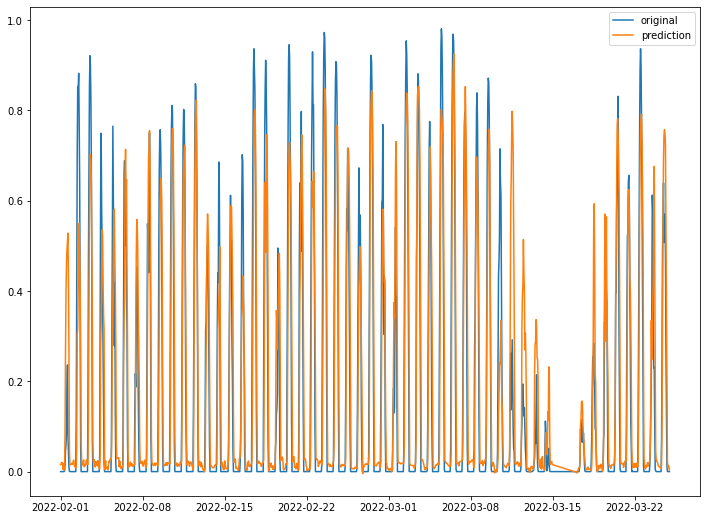

In [59]:
plt.figure(figsize=(12, 9))
plt.plot(plot_x, y_test1, label='original')
plt.plot(plot_x, y_pred, label='prediction')
plt.legend()
plt.show()